# $$Sentiment analysis-on Amazon Fine Foods$$


In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('Reviews.csv')

In [ ]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
df.tail()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...
568453,568454,B001LR2CU2,A3LGQPJCZVL9UC,srfell17,0,0,5,1338422400,Great Honey,"I am very satisfied ,product is as advertised,..."


In [ ]:
df.shape

(568454, 10)

In [ ]:
df.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [ ]:
df = df[:10000]

In [ ]:
df['Text'].value_counts

<bound method IndexOpsMixin.value_counts of 0       I have bought several of the Vitality canned d...
1       Product arrived labeled as Jumbo Salted Peanut...
2       This is a confection that has been around a fe...
3       If you are looking for the secret ingredient i...
4       Great taffy at a great price.  There was a wid...
                              ...                        
9995    we switched from the advance similac to the or...
9996    Like the bad reviews say, the organic formula ...
9997    I wanted to solely breastfeed but was unable t...
9998    i love the fact that i can get this delieved t...
9999    We have a 7 week old... He had gas and constip...
Name: Text, Length: 10000, dtype: object>

In [ ]:
df.shape

(10000, 10)

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *

from nltk import tokenize

sid = SentimentIntensityAnalyzer()

df['sentiment_compound_polarity']=df.Text.apply(lambda x:sid.polarity_scores(x)['compound'])
df['sentiment_neutral']=df.Text.apply(lambda x:sid.polarity_scores(x)['neu'])
df['sentiment_negative']=df.Text.apply(lambda x:sid.polarity_scores(x)['neg'])
df['sentiment_pos']=df.Text.apply(lambda x:sid.polarity_scores(x)['pos'])
df['sentiment_type']=''
df.loc[df.sentiment_compound_polarity>0,'sentiment_type']='POSITIVE'
df.loc[df.sentiment_compound_polarity==0,'sentiment_type']='NEUTRAL'
df.loc[df.sentiment_compound_polarity<0,'sentiment_type']='NEGATIVE'
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment_compound_polarity,sentiment_neutral,sentiment_negative,sentiment_pos,sentiment_type
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.9441,0.695,0.000,0.305,POSITIVE
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-0.5664,0.862,0.138,0.000,NEGATIVE
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.8265,0.754,0.091,0.155,POSITIVE
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.0000,1.000,0.000,0.000,NEUTRAL
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.9468,0.552,0.000,0.448,POSITIVE


In [ ]:
df.tail()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment_compound_polarity,sentiment_neutral,sentiment_negative,sentiment_pos,sentiment_type
9995,9996,B000P41A28,A3A63RACXR1XIL,"A. Boodhoo ""deaddodo""",10,15,1,1204502400,constipation,we switched from the advance similac to the or...,-0.5267,0.852,0.089,0.059,NEGATIVE
9996,9997,B000P41A28,A5VVRGL8JA7R,Adam,2,3,5,1306368000,Constipation Not A Problem if...,"Like the bad reviews say, the organic formula ...",0.6808,0.747,0.091,0.162,POSITIVE
9997,9998,B000P41A28,A2TGDTJ8YCU6PD,geena77,0,0,5,1347494400,Love this formula!,I wanted to solely breastfeed but was unable t...,0.9305,0.811,0.063,0.126,POSITIVE
9998,9999,B000P41A28,AUV4GIZZE693O,"Susan Coe ""sueysis""",1,2,5,1203638400,very convenient,i love the fact that i can get this delieved t...,0.2809,0.697,0.149,0.154,POSITIVE
9999,10000,B000P41A28,A82WIMR4RSVLI,Emrose mom,0,1,4,1337472000,The best weve tried so far,We have a 7 week old... He had gas and constip...,0.9850,0.811,0.026,0.164,POSITIVE


In [ ]:
df.sentiment_type.value_counts()

sentiment_type
POSITIVE    8786
NEGATIVE    1085
NEUTRAL      129
Name: count, dtype: int64

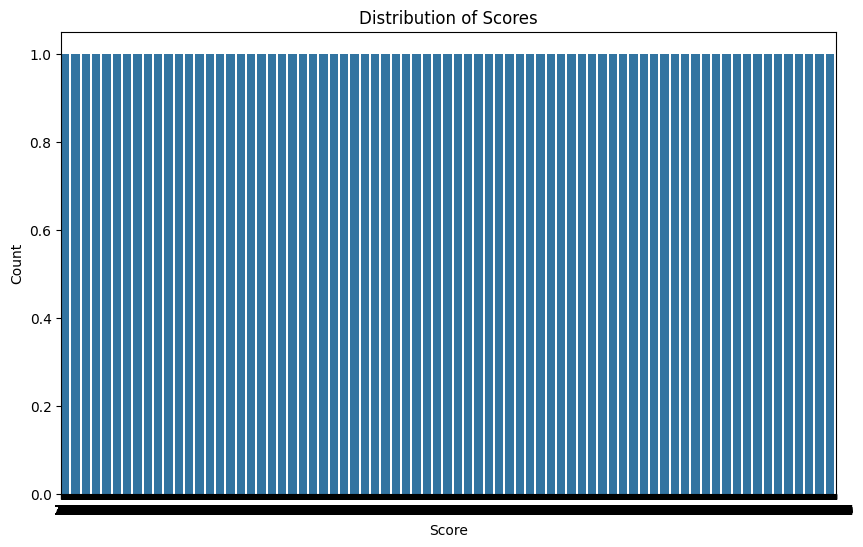

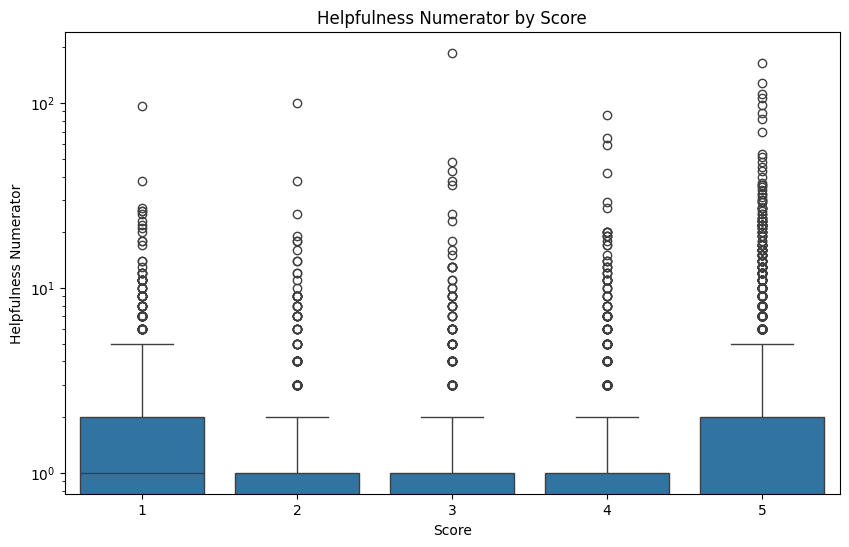

C:\Users\0591\AppData\Local\Temp\ipykernel_4116\1692305859.py:26: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('Time').resample('M').size().plot()


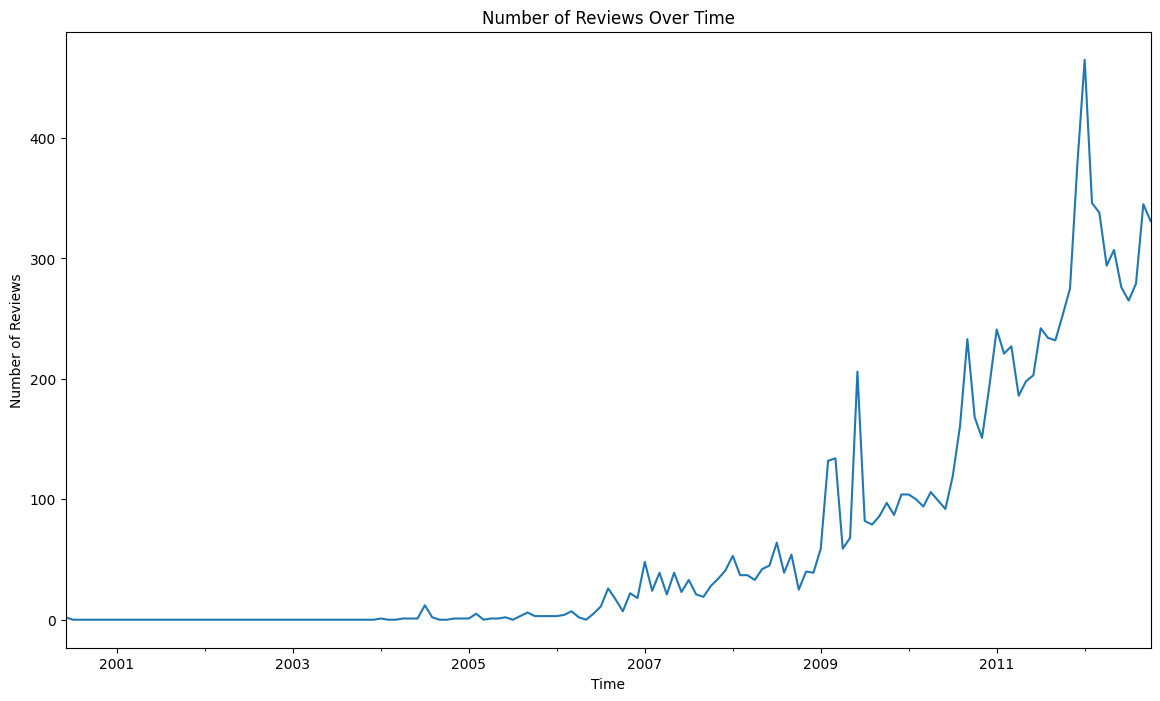

C:\Users\0591\AppData\Local\Temp\ipykernel_4116\1692305859.py:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('Time')['HelpfulnessNumerator'].resample('M').mean().plot()


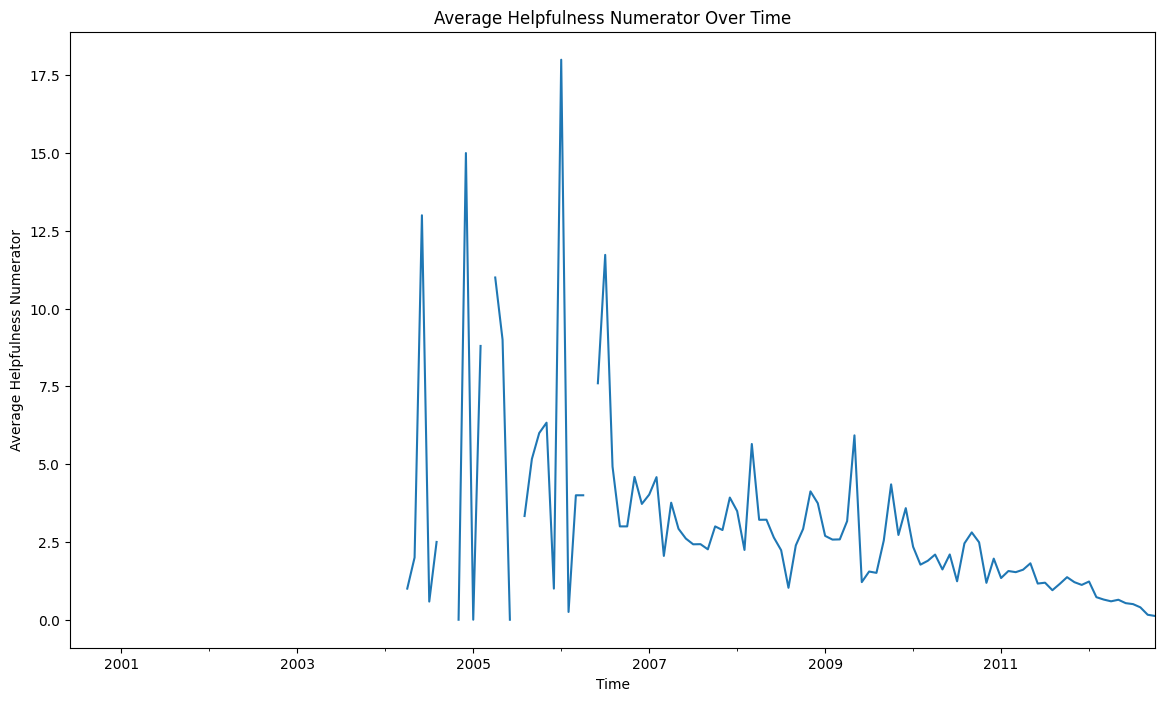

C:\Users\0591\AppData\Local\Temp\ipykernel_4116\1692305859.py:42: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('Time')['Score'].resample('M').mean().plot()


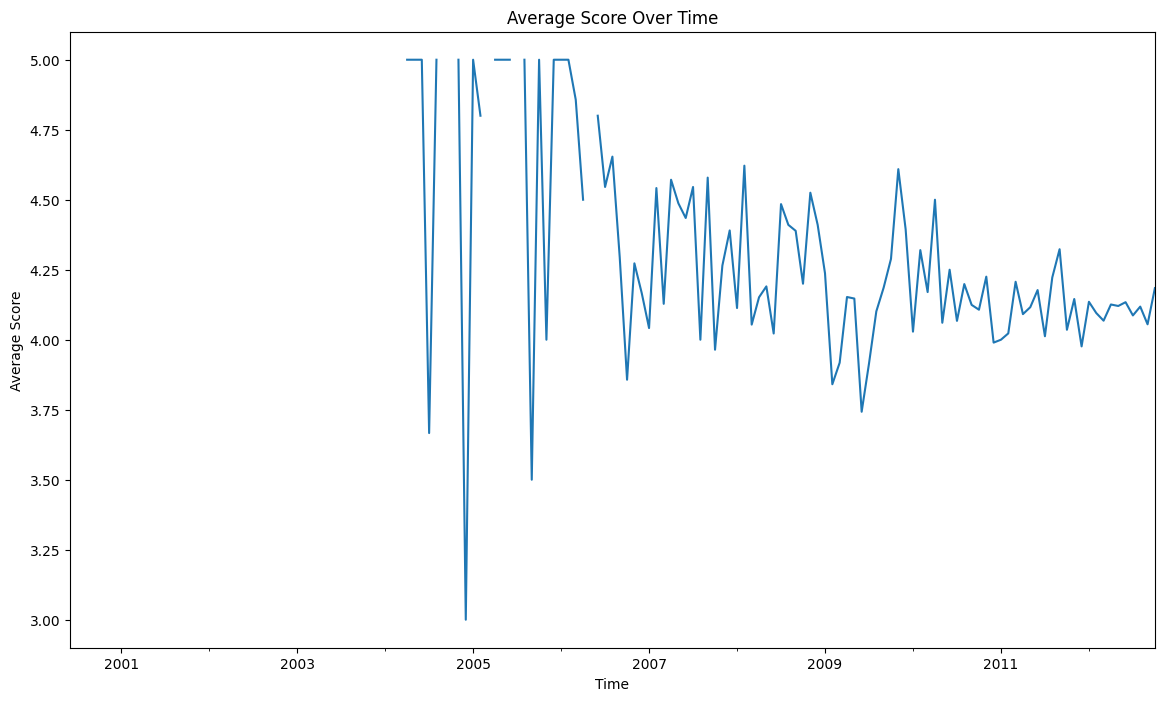

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Time' column to datetime
df['Time'] = pd.to_datetime(df['Time'], unit='s')

# Plot 1: Distribution of Scores
plt.figure(figsize=(10, 6))
sns.countplot(df['Score'])
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

# Plot 2: Helpfulness vs. Score
plt.figure(figsize=(10, 6))
sns.boxplot(x='Score', y='HelpfulnessNumerator', data=df)
plt.title('Helpfulness Numerator by Score')
plt.xlabel('Score')
plt.ylabel('Helpfulness Numerator')
plt.yscale('log')
plt.show()

# Plot 3: Number of Reviews Over Time
plt.figure(figsize=(14, 8))
df.set_index('Time').resample('M').size().plot()
plt.title('Number of Reviews Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Reviews')
plt.show()

# Plot 4: Average Helpfulness Over Time
plt.figure(figsize=(14, 8))
df.set_index('Time')['HelpfulnessNumerator'].resample('M').mean().plot()
plt.title('Average Helpfulness Numerator Over Time')
plt.xlabel('Time')
plt.ylabel('Average Helpfulness Numerator')
plt.show()

# Plot 5: Average Score Over Time
plt.figure(figsize=(14, 8))
df.set_index('Time')['Score'].resample('M').mean().plot()
plt.title('Average Score Over Time')
plt.xlabel('Time')
plt.ylabel('Average Score')
plt.show()

In [ ]:
df=df[['Text','sentiment_type']]

In [ ]:
df.head()

,Text,sentiment_type
0,I have bought several of the Vitality canned d...,POSITIVE
1,Product arrived labeled as Jumbo Salted Peanut...,NEGATIVE
2,This is a confection that has been around a fe...,POSITIVE
3,If you are looking for the secret ingredient i...,NEUTRAL
4,Great taffy at a great price. There was a wid...,POSITIVE


In [ ]:
def text_clean(Text): 
    # changing to lower case
    lower = Text.str.lower()
    
    # Replacing the repeating pattern of &#039;
    pattern_remove = lower.str.replace("&#039;", "")
    
    # Removing all the special Characters
    special_remove = pattern_remove.str.replace(r'[^\w\d\s]',' ')
    
    # Removing all the non ASCII characters
    ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+',' ')
    
    # Removing the leading and trailing Whitespaces
    whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$','')
    
    # Replacing multiple Spaces with Single Space
    multiw_remove = whitespace_remove.str.replace(r'\s+',' ')
    
    # Replacing Two or more dots with one
    dataframe = multiw_remove.str.replace(r'\.{2,}', ' ')
    
    return dataframe

In [ ]:
df['text_clean'] = text_clean(df['Text'])

In [ ]:
df.head()

,Text,sentiment_type,text_clean
0,I have bought several of the Vitality canned d...,POSITIVE,i have bought several of the vitality canned d...
1,Product arrived labeled as Jumbo Salted Peanut...,NEGATIVE,product arrived labeled as jumbo salted peanut...
2,This is a confection that has been around a fe...,POSITIVE,this is a confection that has been around a fe...
3,If you are looking for the secret ingredient i...,NEUTRAL,if you are looking for the secret ingredient i...
4,Great taffy at a great price. There was a wid...,POSITIVE,great taffy at a great price. there was a wid...


In [ ]:
df = df[['text_clean','sentiment_type']]

In [ ]:
df.head()

,text_clean,sentiment_type
0,i have bought several of the vitality canned d...,POSITIVE
1,product arrived labeled as jumbo salted peanut...,NEGATIVE
2,this is a confection that has been around a fe...,POSITIVE
3,if you are looking for the secret ingredient i...,NEUTRAL
4,great taffy at a great price. there was a wid...,POSITIVE


In [ ]:
df = df[:10000]

In [ ]:
df.to_csv('testing.csv')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df.sentiment_type.value_counts()

sentiment_type
POSITIVE    8786
NEGATIVE    1085
NEUTRAL      129
Name: count, dtype: int64

In [ ]:
df['sentiment_type'] = le.fit_transform(df['sentiment_type'])

In [ ]:
df.head()

,text_clean,sentiment_type
0,i have bought several of the vitality canned d...,2
1,product arrived labeled as jumbo salted peanut...,0
2,this is a confection that has been around a fe...,2
3,if you are looking for the secret ingredient i...,1
4,great taffy at a great price. there was a wid...,2


In [ ]:
df.shape

(10000, 2)

In [ ]:
x = df['text_clean']
y= df['sentiment_type']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, stratify=y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer
from scipy import sparse
# Example of preprocessing (adjust as needed)
def preprocess_text(text):
    # Example: converting text to lowercase
    return text.lower()
# Apply preprocessing to your data
x_train_preprocessed = [preprocess_text(text) for text in x_train]
x_test_preprocessed = [preprocess_text(text) for text in x_test]
# Initialize HashingVectorizer
hvectorizer = HashingVectorizer(n_features=1000, norm=None, alternate_sign=False, stop_words='english')
# Transform and keep data in sparse matrix format
x_train_sparse = hvectorizer.fit_transform(x_train_preprocessed)
x_test_sparse = hvectorizer.transform(x_test_preprocessed)
# Optionally, convert to dense arrays if needed for specific operations
x_train_array = x_train_sparse.toarray()
x_test_array = x_test_sparse.toarray()

In [ ]:
x_train

2296    i like loose tea, i just don't like chewing on...
5586    i love the taste of this coffee.  it does not ...
3197    the clams we're ok overall, quality ext accept...
6124    the shipping was very prompt and the packaging...
7698    i have been so happy with this product!  my ba...
                              ...                        
3767    this sauce is something of a permanent staple ...
7909    this product has 24g of protein per serving an...
4828    my two small dogs took to the food immediately...
4847    my dog loves this food.  i really like that it...
7713    my daughter is allergic to all dairy and canno...
Name: text_clean, Length: 7000, dtype: object

In [ ]:
y_train

2296    2
5586    2
3197    2
6124    2
7698    2
       ..
3767    1
7909    2
4828    2
4847    2
7713    2
Name: sentiment_type, Length: 7000, dtype: int32

# $$Model Building$$

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.022535 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4379
[LightGBM] [Info] Number of data points in the train set: 7000, number of used features: 987
[LightGBM] [Info] Start training from score -2.220347
[LightGBM] [Info] Start training from score -4.353856
[LightGBM] [Info] Start training from score -0.129458


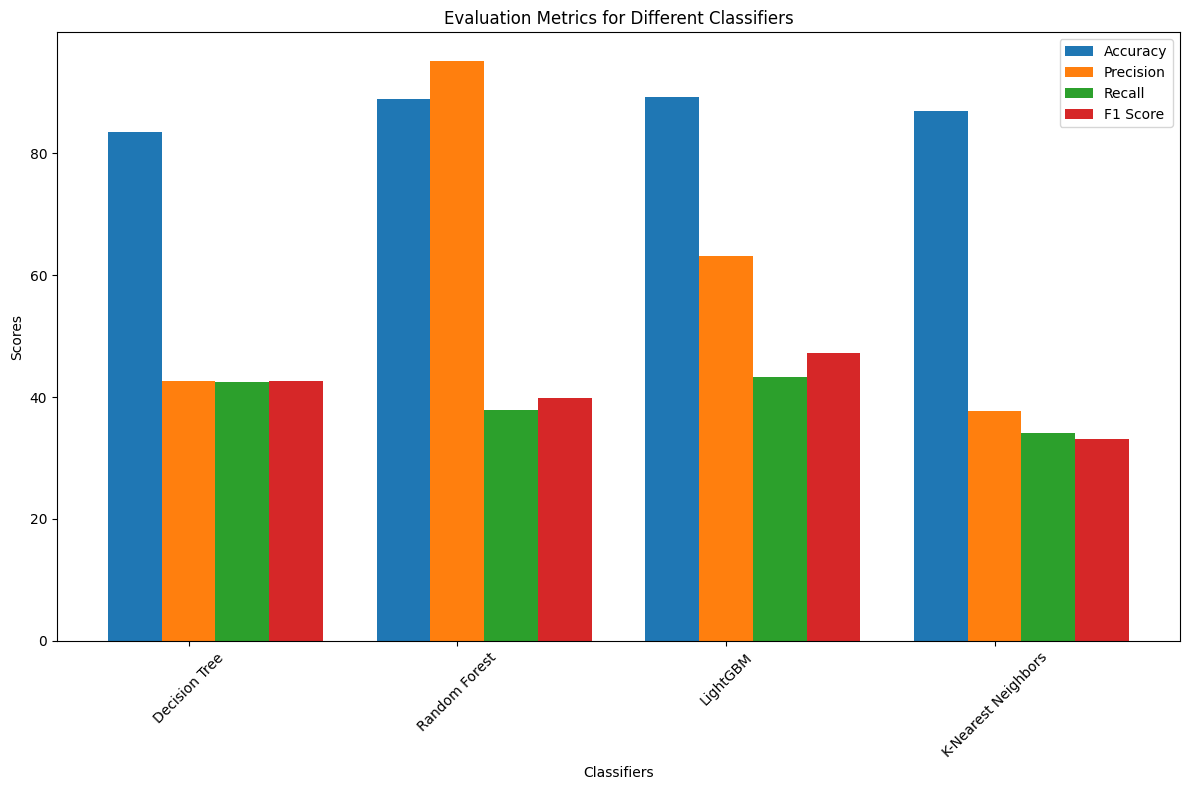

In [ ]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier  # Make sure you have lightgbm installed
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Load data
df = pd.read_csv('Reviews.csv').head(10000)

# Initialize SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Calculate sentiment scores
df['sentiment_compound_polarity'] = df['Text'].apply(lambda x: sid.polarity_scores(x)['compound'])
df['sentiment_type'] = df['sentiment_compound_polarity'].apply(lambda x: 'POSITIVE' if x > 0 else ('NEGATIVE' if x < 0 else 'NEUTRAL'))

# Text cleaning function
def text_clean(Text): 
    Text = Text.str.lower().str.replace("&#039;", "").str.replace(r'[^\w\d\s]', ' ')
    Text = Text.str.replace(r'[^\x00-\x7F]+', ' ').str.replace(r'^\s+|\s+?$', '')
    Text = Text.str.replace(r'\s+', ' ').str.replace(r'\.{2,}', ' ')
    return Text

# Clean text data
df['text_clean'] = text_clean(df['Text'])

# Encode sentiment types
le = LabelEncoder()
df['sentiment_type'] = le.fit_transform(df['sentiment_type'])

# Split data
x_train, x_test, y_train, y_test = train_test_split(df['text_clean'], df['sentiment_type'], stratify=df['sentiment_type'], test_size=0.3, random_state=42)

# Vectorize text data
hvectorizer = HashingVectorizer(n_features=1000, norm=None, alternate_sign=False, stop_words='english')
x_train_sparse = hvectorizer.fit_transform(x_train)
x_test_sparse = hvectorizer.transform(x_test)

# Initialize classifiers
classifiers = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'LightGBM': LGBMClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Train and evaluate classifiers
results = {}
for clf_name, clf in classifiers.items():
    clf.fit(x_train_sparse, y_train)
    y_pred = clf.predict(x_test_sparse)
    acc = accuracy_score(y_test, y_pred) * 100
    pre = precision_score(y_test, y_pred, average='macro') * 100
    recall = recall_score(y_test, y_pred, average='macro') * 100
    f1 = f1_score(y_test, y_pred, average='macro') * 100
    results[clf_name] = {'Accuracy': acc, 'Precision': pre, 'Recall': recall, 'F1 Score': f1}

# Plot results
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
clf_names = list(results.keys())
x = np.arange(len(clf_names))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 8))
for i, metric in enumerate(metrics):
    values = [results[clf][metric] for clf in clf_names]
    ax.bar(x + i * width, values, width, label=metric)

ax.set_xlabel('Classifiers')
ax.set_ylabel('Scores')
ax.set_title('Evaluation Metrics for Different Classifiers')
ax.set_xticks(x + width)
ax.set_xticklabels(clf_names, rotation=45)
ax.legend()
plt.tight_layout()
plt.show()

### LSTM

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from keras.callbacks import EarlyStopping
# Tokenize text data
max_words = 5000
max_len = 200
tokenizer = Tokenizer(num_words=max_words, lower=True)
tokenizer.fit_on_texts(x_train)
x_train_seq = tokenizer.texts_to_sequences(x_train)
x_test_seq = tokenizer.texts_to_sequences(x_test)

# Pad sequences
x_train_pad = pad_sequences(x_train_seq, maxlen=max_len)
x_test_pad = pad_sequences(x_test_seq, maxlen=max_len)

# Create LSTM model
embedding_dim = 100
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
epochs = 5
batch_size = 64

history = model.fit(x_train_pad, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test_pad, y_test), callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

# Evaluate the model
y_pred = model.predict(x_test_pad)
y_pred_classes = y_pred.argmax(axis=1)

acc = accuracy_score(y_test, y_pred_classes) * 100
pre = precision_score(y_test, y_pred_classes, average='macro') * 100
recall = recall_score(y_test, y_pred_classes, average='macro') * 100
f1 = f1_score(y_test, y_pred_classes, average='macro') * 100

results = {
    'LSTM': {
        'Accuracy': acc,
        'Precision': pre,
        'Recall': recall,
        'F1 Score': f1
    }
}

print(f"LSTM Model Results:\nAccuracy: {acc:.2f}%\nPrecision: {pre:.2f}%\nRecall: {recall:.2f}%\nF1 Score: {f1:.2f}%")




Epoch 1/5


110/110 [==============================] - 45s 374ms/step - loss: 0.4701 - accuracy: 0.8710 - val_loss: 0.4123 - val_accuracy: 0.8787
Epoch 2/5
110/110 [==============================] - 44s 398ms/step - loss: 0.3621 - accuracy: 0.8823 - val_loss: 0.3601 - val_accuracy: 0.8777
Epoch 3/5
110/110 [==============================] - 43s 387ms/step - loss: 0.2602 - accuracy: 0.9024 - val_loss: 0.3341 - val_accuracy: 0.8887
Epoch 4/5
110/110 [==============================] - 50s 451ms/step - loss: 0.1951 - accuracy: 0.9327 - val_loss: 0.3843 - val_accuracy: 0.8920
Epoch 5/5
94/94 [==============================] - 4s 36ms/step
LSTM Model Results:
Accuracy: 89.00%
Precision: 66.27%
Recall: 43.51%
F1 Score: 46.29%


### BERT

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import ktrain
from ktrain import text
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load data
df = pd.read_csv(r'Reviews.csv').head(10000)

# Initialize SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Calculate sentiment scores
df['sentiment_compound_polarity'] = df['Text'].apply(lambda x: sid.polarity_scores(x)['compound'])
df['sentiment_type'] = df['sentiment_compound_polarity'].apply(lambda x: 'POSITIVE' if x > 0 else ('NEGATIVE' if x < 0 else 'NEUTRAL'))

# Text cleaning function
def text_clean(text):
    text = text.lower().replace("&#039;", "").replace(r'[^\w\d\s]', ' ')
    text = text.replace(r'[^\x00-\x7F]+', ' ').replace(r'^\s+|\s+?$', '')
    text = text.replace(r'\s+', ' ').replace(r'\.{2,}', ' ')
    return text

# Clean text data
df['text_clean'] = df['Text'].apply(text_clean)

# Filter out neutral sentiments
df = df[df['sentiment_type'] != 'NEUTRAL']

# Encode sentiment types
le = LabelEncoder()
df['sentiment_type'] = le.fit_transform(df['sentiment_type'])
class_names = le.classes_

# Split data
x_train, x_test, y_train, y_test = train_test_split(df['text_clean'], df['sentiment_type'], stratify=df['sentiment_type'], test_size=0.3, random_state=42)

# Preprocess data using BERT mode
(x_train, y_train), (x_test, y_test), preproc = text.texts_from_array(
    x_train=x_train.tolist(), y_train=y_train.tolist(),
    x_test=x_test.tolist(), y_test=y_test.tolist(),
    class_names=class_names,
    preprocess_mode='bert',
    maxlen=128
)

# Create and compile the BERT model
model = text.text_classifier('bert', train_data=(x_train, y_train), preproc=preproc)

# Create a learner object
learner = ktrain.get_learner(model, train_data=(x_train, y_train), val_data=(x_test, y_test), batch_size=6)

# Train the model
learner.fit_onecycle(2e-5, 2)

# # Validate the model
# learner.validate(val_data=(x_test, y_test), class_names=class_names)

# # Create a predictor
# predictor = ktrain.get_predictor(learner.model, preproc)

# # Test a single prediction
# message = "Hello ?"
# start_time = time.time()
# prediction = predictor.predict(message)
# print('predicted: {} ({:.2f})'.format(prediction, (time.time() - start_time)))

# # Save the model
# predictor.save("bert_model.h5")

# # Plot the accuracy
# plt.plot(learner.history.history['accuracy'], 'r')
# plt.plot(learner.history.history['val_accuracy'], 'b')
# plt.title('Model Accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Validation'], loc='upper left')
# plt.savefig("bert_acc.png")
# plt.show()

# # Plot the loss
# plt.plot(learner.history.history['loss'], 'r')
# plt.plot(learner.history.history['val_loss'], 'b')
# plt.title('Model Loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Validation'], loc='upper left')
# plt.savefig("bert_loss.png")
# plt.show()